 ## Análise Exploratória

 #### Definição do problema de negócio
 Durante a construção do planejamento do proximo ano,
foi identificado a necessidade de criar alguns KPIs com intuito de acompanhar o andamento e resultados do time de crédito da empresa.
 E a partir destas informações será possivel traçar estratégias e metas visando corrigir erros passados.

 #### Questões a serem respondidas: 
1. Quantos registros válidos há e qual o total de aprovados e reprovados?
2. Qual a faixa etária com maior média de aprovação de crédito?
3. Quais a principais caracteristicas dos grupos de crédito (aprovado, reprovado)?
4. Percentil da renda entre os grupos de crédito (aprovado, reprovado)?
5. Ter carteira de motorista influencia na liberação de crédito?
6. Qual a relação  de creditos aprovados e reprovados entre os diferentes tipos de Cidadania?
7. Entre pessoas com menos de 1 ano empregadas, qual a relação entre pessoas que tirevam creditos aprovados e reprovados?
8. Qual a média de score entre os creditos aprovados e reprovados?
9. Qual a média dos atributos dos clientes?

In [92]:
#%pip install matplotlib-venn

import os.path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import numpy as np
from matplotlib_venn import venn2

sns.set_theme(style = "whitegrid")
name_file = 'dataset.csv'

### Funções

In [93]:
def getDataFrame():
    if os.path.isfile(name_file):
        return pd.read_csv(name_file)
    else:
        raise TypeError('Arquivo não encontrado!')

def generate_graphic_1(self):
    results = [self.count_approved, self.count_rejected]
    labels = ["Aprovados {} ({:0.2f} %)".format(self.count_approved, self.percent_approved), "Reprovados {} ({:0.2f} %)".format(self.count_rejected, self.percent_rejected)]
    plt.figure(figsize=(3,3))
    plt.pie(results, labeldistance=1, radius=3, wedgeprops=dict(width=0.8))
    plt.legend(labels=labels, loc='center', prop={'size':12})
    plt.title("Total por Resultado", loc='Center', fontdict={'fontsize':20, 'fontweight':20})
    plt.show()

def generate_range_age(df):
    ranges = [0, 18, 27, 35, 42, 60, 80, 110]
    labels = [
        'Underage',
        '18 to 27',
        '28 to 35',
        '36 to 42',
        '43 to 60',
        '61 to 80',
        '81 to 110'
    ]
    df_age = pd.DataFrame()
    df_age = pd.cut(x=df, bins=ranges, labels=labels)
    return df_age

def generate_range_years_emp(df):
    ranges = [0, 1, 3, 5, 10, 15, 25, 100]
    labels = [
        '< 1 year',
        '1 to 3',
        '4 to 5',
        '6 to 10',
        '10 to 15',
        '16 to 25',
        '> 25 years'
    ]
    df_years_emp = pd.DataFrame()
    df_years_emp = pd.cut(x=df, bins=ranges, labels=labels)
    return df_years_emp

def generate_range_income(df):
    values = list(df.unique())
    values.sort(reverse=False)
    ranges = [-1, 1000, 2500, 4000, 7000, 12000, 20000, 100000]
    labels = [
        '< 1k',
        '1k to 2.5k',
        '2.5k to 4k',
        '4k to 7k',
        '7k to 12k',
        '12k to 20k',
        '> 20k'
    ]
    df_income = pd.DataFrame()
    df_income = pd.cut(x=df, bins=ranges, labels=labels)
    return df_income

def add_label(plot):
    for i in plot.patches:
        plot.annotate(i.get_height(), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0,1), textcoords='offset points')
    
def generate_graphic_3(df_approved, df_rejected):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=False)
    fig.suptitle('Main Customer Characteristics')

    years_approved = pd.DataFrame()
    ranges_years = df_approved['YearsEmployed'].value_counts()
    years_approved['Years'] = ranges_years.index.categories.values
    years_approved['Occurrences'] = ranges_years.values
    plot1 = sns.barplot(ax=axes[0][0], x='Years', y='Occurrences', data=years_approved)
    axes[0][0].set_title("Years Employed per Range (Credit Approved)")
    add_label(plot1)
    

    years_rejected = pd.DataFrame()
    ranges_years = df_rejected['YearsEmployed'].value_counts()
    years_rejected['Years'] = ranges_years.index.categories.values
    years_rejected['Occurrences'] = ranges_years.values
    plot2 = sns.barplot(ax=axes[0][1], x='Years', y='Occurrences', data=years_rejected)
    axes[0][1].set_title("Years Employed per Range (Credit Rejected)")
    add_label(plot2)
    
    income_approved  = pd.DataFrame()
    income_ranges = df_approved['Income'].value_counts()
    income_approved['Ranges of Income'] = income_ranges.index.categories.values
    income_approved['Occurrences'] = income_ranges.values
    plot3 = sns.barplot(ax=axes[1][0], x='Ranges of Income', y='Occurrences', data=income_approved)
    axes[1][0].set_title("Income per Range (Credit Approved)")
    add_label(plot3)

    income_rejected = pd.DataFrame()
    income_ranges = df_rejected['Income'].value_counts()
    income_rejected['Ranges of Income'] = income_ranges.index.categories.values
    income_rejected['Occurrences'] = income_ranges.values
    plot4 = sns.barplot(ax=axes[1][1], x='Ranges of Income', y='Occurrences', data=income_rejected)
    axes[1][1].set_title("Income per Range (Credit Rejected)")
    add_label(plot4)

def lambda_boolean(df, name):
    return list(map(lambda x: True if x > 0 else False, df[name]))

def run_etl_df(df):
    df = df.drop(columns=['Industry', 'Ethnicity', 'PriorDefault', 'Citizen', 'ZipCode', 'Approved'])
    df['Gender'] = list(map(lambda x: "Female" if x == 0 else "Male", df['Gender']))
    df['Age'] = generate_range_age(df['Age'])
    df['Debt'] = lambda_boolean(df, 'Debt')
    df['Married'] = lambda_boolean(df, 'Married')
    df['BankCustomer'] = lambda_boolean(df, 'BankCustomer')
    df['Employed'] = lambda_boolean(df, 'Employed')
    df['DriversLicense'] = lambda_boolean(df, 'DriversLicense')
    df['YearsEmployed'] = generate_range_years_emp(df['YearsEmployed'])
    df['Income'] = generate_range_income(df['Income'])
    return df

### Classe Principal

In [202]:
class Analyze:
    def __init__(self):
        self.df = getDataFrame()
        self.df_approved = self.df[self.df['Approved'] == 1]
        self.df_rejected = self.df[self.df['Approved'] == 0]
        self.count_total = len(self.df)
        self.count_approved = len(self.df_approved)
        self.count_rejected = len(self.df_rejected)
        self.percent_rejected = (self.count_rejected / self.count_total) * 100
        self.percent_approved = (self.count_approved / self.count_total) * 100
        self.df_approved_etl = run_etl_df(self.df_approved.copy())
        self.df_rejected_etl = run_etl_df(self.df_rejected.copy())

    def check_na(self):
        print("Possui valores vazios: {}".format(self.df.isnull().values.any()))

    def answer_1(self):
        
        print("Total: {}\nAprovados {}\nReprovados {}".format(self.count_total, self.count_approved, self.count_rejected))
        generate_graphic_1(self)

    def answer_2(self):
        self.mean_age_approved = self.df_approved['Age'].mean()
        print('A idade com maior média de aprovação é de {} anos.'.format(int(self.mean_age_approved)))

    def answer_3(self):
        
        generate_graphic_3(self.df_approved_etl, self.df_rejected_etl)

    def answer_4(self):
        df_percentil_income = pd.DataFrame()
        list_percentil = [25,50,75,100]
        df_percentil_income['Percentil'] = list_percentil
        df_percentil_income['Income for Approved'] = np.percentile(a=self.df_approved['Income'], q=list_percentil)
        df_percentil_income['Income for  Rejected'] = np.percentile(a=self.df_rejected['Income'], q=list_percentil)
        print(df_percentil_income.head())
        
    def answer_5(self):
        df_license = pd.DataFrame()
        df_license['have_license'] = list(map(lambda x: 'Have' if x > 0 else 'Not_Have', self.df['DriversLicense']))
        df_license['was_approved'] = list(map(lambda x: 'Approved' if x > 0 else 'Rejected', self.df['Approved']))
        count_have_license = df_license.value_counts()
        print(count_have_license.head(10))

    def answer_6(self):
        df_citizen = pd.DataFrame()
        df_citizen['citizen'] = self.df['Citizen']
        df_citizen['aproved'] = list(map(lambda x: 'Approved' if x > 0 else 'Rejected', self.df['Approved']))
        count_citizes = df_citizen.value_counts()
        print(count_citizes.head(10))

    def answer_7(self):
        count_approved = len(self.df_approved[self.df_approved['YearsEmployed'] <= 1])
        count_rejected = len(self.df_rejected[self.df_rejected['YearsEmployed'] <= 1])
        print("Foi liberado crédito á {} pessoas, e recusados foram {}. Relação é entre pessoas com menos de 1 ano no mesmo emprego.".format(count_approved, count_rejected))

    def answer_8(self):
        mean_approved = self.df_approved['CreditScore'].mean()
        mean_rejected = self.df_rejected['CreditScore'].mean()
        print("A média de score dos creditos aprovados é {}, enquanto para os reprovados é {}.".format(round(mean_approved), round(mean_rejected)))

    def answer_9(self):
        #9. Qual a média dos atributos dos clientes?
        df_gender = pd.DataFrame()
        #df_gender = self.df_approved_etl.value_counts('Gender')
        df_gender['Gender'] = self.df_approved_etl['Gender']
        df_sum = self.df_approved_etl + self.df_rejected_etl
        freq = df_sum.groupby(['Gender']).count()
        print(freq)
        #maior = (t1['Male'] / t1.values().sum()) * 100
        #print('sum:', sum)
        #print('max:', t1['Male'].max())
        #print('percent male:', male, '- index', t1['Male'].max().index())
        #teste = self.df_approved.describe().mean()
        #print(t1.describe())

    def generate_answers(self):
        self.answer_1()
        self.answer_2()
        self.answer_3()
        self.answer_4()
        self.answer_5()
        self.answer_6()
        self.answer_7()
        self.answer_8()
        self.answer_9()


analyze = Analyze()
#analyze.generate_answers()
analyze.answer_9()
#print('xxxxx:', analyze.df_approved_etl)

TypeError: unsupported operand type(s) for +: 'Categorical' and 'Categorical'

#### Test Units

In [189]:
from nose.tools import assert_raises

class TestUnits(object):

    def test_file_exist(self):
        analyze = Analyze()
        not assert_raises(TypeError, analyze)
        print('TEST - test_file_exist: OK!')

    def test_file_not_exist(self):
        analyze = Analyze()
        assert_raises(TypeError, analyze)
        print('TEST - test_file_not_exist: OK!')

def runTestUnits():
    test = TestUnits()
    test.test_file_exist()
    test.test_file_not_exist()

#### Main

TEST - test_file_exist: OK!
TEST - test_file_not_exist: OK!
Possui valores vazios: False
Total: 690
Aprovados 307
Reprovados 383


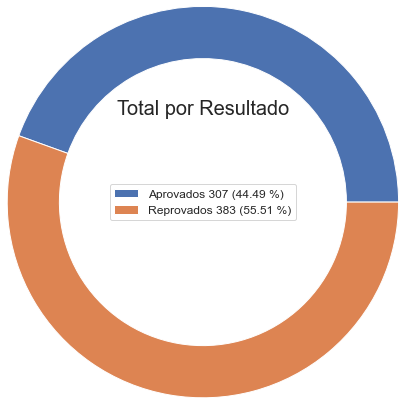

A idade com maior média de aprovação é de 33 anos.
   Percentil  Income for Approved  Income for  Rejected
0         25                  0.0                   0.0
1         50                221.0                   1.0
2         75               1209.0                  67.0
3        100             100000.0                5552.0
have_license  was_approved
Not_Have      Rejected        213
Have          Rejected        170
Not_Have      Approved        161
Have          Approved        146
dtype: int64
citizen       aproved 
ByBirth       Rejected    338
              Approved    287
ByOtherMeans  Rejected     42
              Approved     15
Temporary     Approved      5
              Rejected      3
dtype: int64
Foi liberado crédito á 95 pessoas, e recusados foram 267. Relação é entre pessoas com menos de 1 ano no mesmo emprego.
A média de score dos creditos aprovados é 5, enquanto para os reprovados é 1.
t1: Gender
Male      209
Female     98
dtype: int64


AttributeError: 'int' object has no attribute 'value'

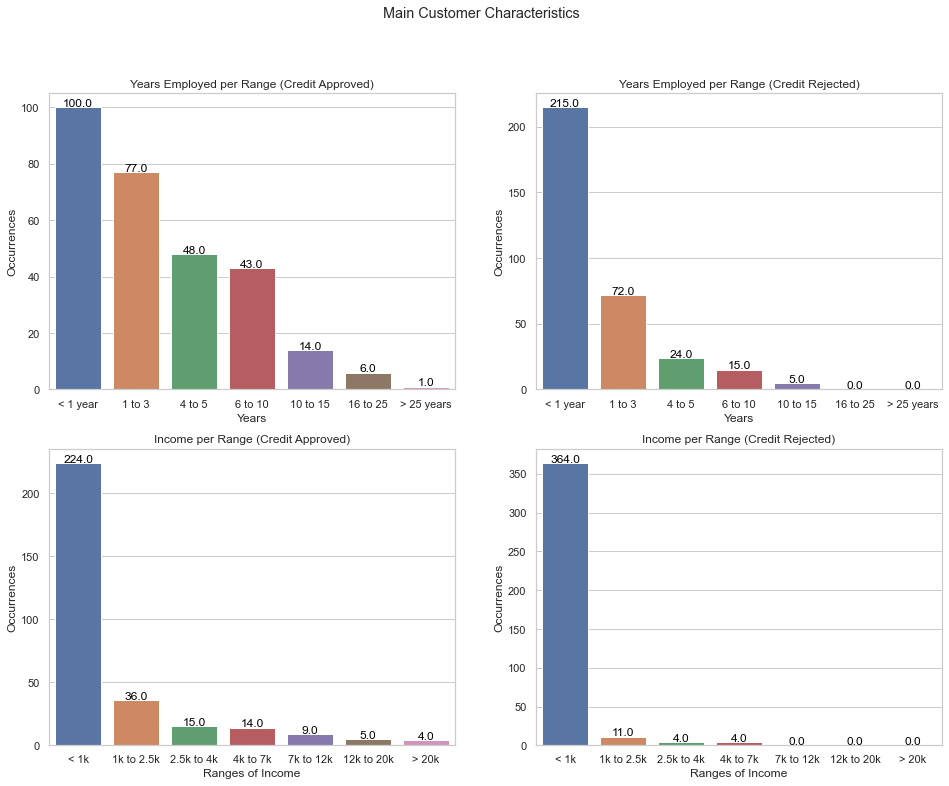

In [116]:
def main():
    runTestUnits()
    analyze = Analyze()
    analyze.check_na()
    analyze.generate_answers()
    

if __name__ == '__main__':
    main()

In [97]:
#df_full = pd.read_csv("dataset.csv")
#df = df_full.copy()

In [98]:
#df.head()

In [99]:
#df = df.drop(columns=["Ethnicity"])

In [100]:
#df['Citizen'].unique()

In [88]:
#Altera label da coluna Industry
#citizen_map = {'ByBirth':0, 'ByOtherMeans':1, 'Temporary':2}

In [89]:
#df['Citizen'] = df['Citizen'].map(citizen_map)
#df['Citizen']

In [90]:
#df.head()

In [91]:
#Altera label da coluna Industry
#label_names = df['Industry'].unique()
#index_labels = list(range(len(label_names)))
#df['Industry'] = df['Industry'].map(dict(zip(label_names, index_labels)))
#df['Industry']
